# **Plotting Confusion Matrix Exercise (Practice)**

## Assignment:


Your task for this exercise is to create a confusion matrix visualized as a heatmap.

Use the results of the tree models you created in the Classification Tree Exercise based on the breast cancer data set as the basis for your confusion matrix. The data for that exercise can be found [here](https://drive.google.com/file/d/1Zms1RfgkWrTp7S6_BFpeELYyvX1s2FSN/view?usp=sharing). The target vector is the diagnosis as either malignant (M) or benign (B).

Sklearn allows us to create a confusion matrix very easily. First import the confusion matrix as shown:



```
from sklearn.metrics import ConfusionMatrixDisplay
```



**Note**: This is just an example of what the code and output would look like for a model instantiated as "model".





```
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap = 'Blues')
```



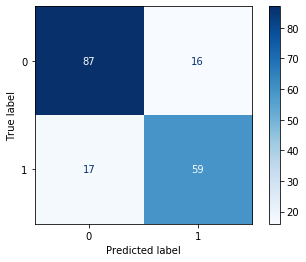

For this exercise, you can answer questions about your classification tree (although you may want to look at your results for the bagging classifier and random forest classifier to see how they compare)


# **Copy cells from Classification Tree Exercise**

# Preliminary Steps

In [ ]:
# import libraries

# foundation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# preprocessing
from sklearn.model_selection import train_test_split

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# regression metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
# mount drive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# load data

path = '/content/drive/MyDrive/Coding Dojo/07 Week 7: Classification Models/cancer.csv'
df = pd.read_csv(path)

In [ ]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
300,892438,M,19.530,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.106200,...,25.93,26.24,171.10,2053.0,0.1495,0.4116,0.61210,0.19800,0.2968,0.09929
486,913102,B,14.640,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.027910,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.24370,0.07828,0.2455,0.06596
492,914062,M,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.077620,...,21.53,26.06,143.40,1426.0,0.1309,0.2327,0.25440,0.14890,0.3251,0.07625
187,874373,B,11.710,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.032390,...,13.01,21.39,84.42,521.5,0.1323,0.1040,0.15210,0.10990,0.2572,0.07097
27,852781,M,18.610,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.077310,...,21.31,27.26,139.90,1403.0,0.1338,0.2117,0.34460,0.14900,0.2341,0.07421
329,895633,M,16.260,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.079810,...,17.73,25.21,113.70,975.2,0.1426,0.2116,0.33440,0.10470,0.2736,0.07953
497,914580,B,12.470,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.023690,...,14.06,24.34,92.82,607.3,0.1276,0.2506,0.20280,0.10530,0.3035,0.07661
442,90944601,B,13.780,15.79,88.37,585.9,0.08817,0.06718,0.01055,0.009937,...,15.27,17.50,97.90,706.6,0.1072,0.1071,0.03517,0.03312,0.1859,0.06810
176,872608,B,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.037160,...,11.26,24.39,73.07,390.2,0.1301,0.2950,0.34860,0.09910,0.2614,0.11620
108,86355,M,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.182300,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.96080,0.29100,0.4055,0.09789


In [ ]:
df.describe(include = 'number')

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.describe(include = 'object')

,diagnosis
count,569
unique,2
top,B
freq,357


In [ ]:
# check to see if data is balanced
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# check with percentages (alternative)
df['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [ ]:
# check for duplicates
df.duplicated().sum()

0

In [ ]:
'''
# set function for evaluating models with error metrics
# (copied from Josh Johnson's Code-Along Notebook from 4/3/2023 CD class)

## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics for a model
def eval_model(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')
'''

'\n# set function for evaluating models with error metrics\n# (copied from Josh Johnson\'s Code-Along Notebook from 4/3/2023 CD class)\n\n## Create a function to take the true and predicted values\n## and print MAE, MSE, RMSE, and R2 metrics for a model\ndef eval_model(y_true, y_pred, name=\'model\'):\n  """Takes true targets and predictions from a model and prints\n  MAE, MSE, RMSE, AND R2 scores\n  Set \'name\' to name of model and \'train\' or \'test\' as appropriate"""\n  mae = mean_absolute_error(y_true, y_pred)\n  mse = mean_squared_error(y_true, y_pred)\n  rmse = np.sqrt(mse)\n  r2 = r2_score(y_true, y_pred)\n\n  print(f\'{name} Scores\')\n  print(f\'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n\')\n'

In [ ]:
'''
# make function that will calculate all metrics for a model after it has been 
# fitted, and return a df with the metrics

def eval_model(model, X_train, X_test, y_train, y_test):

  # create list of metrics and df to store calculations
  metrics = ['MAE', 'MSE', 'RMSE', 'R2']
  metrics = pd.DataFrame(index = metrics, 
                         columns = [str(model) + '\n' + 'Train Score', 
                                    str(model) + '\n' + 'Test Score'])

  # create training and testing predictions
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)
  
  # calculate mae for training and testing data
  train_mae = mean_absolute_error(y_train, train_pred)
  test_mae = mean_absolute_error(y_test, test_pred)

  # calculate mse
  train_mse = mean_squared_error(y_train, train_pred)
  test_mse = mean_squared_error(y_test, test_pred)

  # calculate r2
  train_r2 = r2_score(y_train, train_pred)
  test_r2 = r2_score(y_test, test_pred)

  # store values in df
  metrics.loc['MAE', str(model) + '\n' + 'Train Score'] = train_mae
  metrics.loc['MAE', str(model) + '\n' + 'Test Score'] = test_mae
  metrics.loc['MSE', str(model) + '\n' + 'Train Score'] = train_mse
  metrics.loc['MSE', str(model) + '\n' + 'Test Score'] = test_mse
  metrics.loc['RMSE', str(model) + '\n' + 'Train Score'] = np.sqrt(train_mse)
  metrics.loc['RMSE', str(model) + '\n' + 'Test Score'] = np.sqrt(test_mse)
  metrics.loc['R2', str(model) + '\n' + 'Train Score'] = train_r2
  metrics.loc['R2', str(model) + '\n' + 'Test Score'] = test_r2

  return metrics

'''

"\n# make function that will calculate all metrics for a model after it has been \n# fitted, and return a df with the metrics\n\ndef eval_model(model, X_train, X_test, y_train, y_test):\n\n  # create list of metrics and df to store calculations\n  metrics = ['MAE', 'MSE', 'RMSE', 'R2']\n  metrics = pd.DataFrame(index = metrics, \n                         columns = [str(model) + '\n' + 'Train Score', \n                                    str(model) + '\n' + 'Test Score'])\n\n  # create training and testing predictions\n  train_pred = model.predict(X_train)\n  test_pred = model.predict(X_test)\n  \n  # calculate mae for training and testing data\n  train_mae = mean_absolute_error(y_train, train_pred)\n  test_mae = mean_absolute_error(y_test, test_pred)\n\n  # calculate mse\n  train_mse = mean_squared_error(y_train, train_pred)\n  test_mse = mean_squared_error(y_test, test_pred)\n\n  # calculate r2\n  train_r2 = r2_score(y_train, train_pred)\n  test_r2 = r2_score(y_test, test_pred)\n\n  #

# Preprocessing

In [ ]:
# convert string target variable values to numbers
df['diagnosis'].replace({'B': 0,
                         'M': 1},
                        inplace = True)

In [ ]:
# split into features matrix and target vector
target = 'diagnosis'
y = df[target]
X = df.drop(columns = target)

In [ ]:
# train test split (model validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Decision Tree Classifier Model

In [ ]:
# instantiate model with default parameter settings
dec_tree_class = DecisionTreeClassifier(random_state = 42)

In [ ]:
# fit model on training data
dec_tree_class.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# get accuracy for model
print(f"Model's accuracy score on training data: {dec_tree_class.score(X_train, y_train)}")
print(f"Model's accuracy score on testing data: {dec_tree_class.score(X_test, y_test)}")

Model's accuracy score on training data: 1.0
Model's accuracy score on testing data: 0.951048951048951


In [ ]:
# consider tuning hyperparameters (solution notebook did not tune hyperparameters, so model
# accuracy scores will differ slightly)
# example from LP: max_depth
dec_tree_class.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# tune hyperparameter max_depth to improve model performance on test

# get depth from default model
dec_tree_class.get_depth()

7

In [ ]:
# loop through depths 2-7, calculate error metrics, and choose best version of model
depths = list(range(2, 7))

scores = pd.DataFrame(index = depths,
                      columns = ['Test Score',
                                 'Train Score'])

for depth in depths:
  dec_tree = DecisionTreeClassifier(max_depth = depth,
                                    random_state = 42)
  dec_tree.fit(X_train, y_train)
  train_pred = dec_tree.predict(X_train)
  test_pred = dec_tree.predict(X_test)
  train_acc = dec_tree.score(X_train, y_train)
  test_acc = dec_tree.score(X_test, y_test)
  scores.loc[depth, 'Train Score'] = train_acc
  scores.loc[depth, 'Test Score'] = test_acc

sorted_scores = scores.sort_values(by = 'Test Score',
                                   ascending = False)

sorted_scores.head()

,Test Score,Train Score
3,0.958042,0.971831
5,0.958042,0.995305
4,0.944056,0.995305
6,0.944056,0.997653
2,0.916084,0.946009


In [ ]:
# instantiate best version of model
dec_tree_class_3 = DecisionTreeClassifier(max_depth = 3,
                                          random_state = 42)

In [ ]:
# fit model on training data only
dec_tree_class_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# get accuracy for model
print(f"Model's accuracy score on training data: {dec_tree_class_3.score(X_train, y_train)}")
print(f"Model's accuracy score on testing data: {dec_tree_class_3.score(X_test, y_test)}")

Model's accuracy score on training data: 0.971830985915493
Model's accuracy score on testing data: 0.958041958041958


# Bagging Classifier Model

In [ ]:
# instantiate model with default parameters
bag_class = BaggingClassifier(random_state = 42)

In [ ]:
# fit model on training data
bag_class.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [ ]:
# get accuracy for model
print(f"Model's accuracy score on training data: {bag_class.score(X_train, y_train)}")
print(f"Model's accuracy score on testing data: {bag_class.score(X_test, y_test)}")

Model's accuracy score on training data: 0.9929577464788732
Model's accuracy score on testing data: 0.951048951048951


In [ ]:
# consider tuning hyperparameters
# example from LP: n_estimators
bag_class.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# tune hyperparameter n_estimators to improve model performance on test data

# start by guessing some number of n_estimators (refine later if necessary)

num_estimators = [50, 100, 150, 200]

scores = pd.DataFrame(index = num_estimators, columns = ['Test Score',
                                                         'Train Score'])

for num in num_estimators:
  bag_class = BaggingClassifier(n_estimators = num,
                                random_state = 42)
  bag_class.fit(X_train, y_train)
  train_score = bag_class.score(X_train, y_train)
  test_score = bag_class.score(X_test, y_test)
  scores.loc[num, 'Train Score'] = train_score
  scores.loc[num, 'Test Score'] = test_score

sorted_scores = scores.sort_values(by = 'Test Score',
                                     ascending = False)
  
sorted_scores.head()

,Test Score,Train Score
50,0.958042,1.0
100,0.958042,1.0
150,0.958042,1.0
200,0.958042,1.0


In [ ]:
# should put plot here to see how n_estimators affects performance

In [ ]:
# best version of model is the default (same accuracy score as models with different num_estimators)

# Random Forest Classifier Model

In [ ]:
# instantiate model with default parameter settings
rf_class = RandomForestClassifier(random_state = 42)

In [ ]:
# fit model on training data
rf_class.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# get accuracy for model
print(f"Model's accuracy score on training data: {rf_class.score(X_train, y_train)}")
print(f"Model's accuracy score on testing data: {rf_class.score(X_test, y_test)}")

Model's accuracy score on training data: 1.0
Model's accuracy score on testing data: 0.972027972027972


In [ ]:
# these accuracy scores differ from the rf classifier in the solutions notebook??

In [ ]:
# consider tuning hyperparameters
# example from LP: max_depth
rf_class.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# did not tune any hyperparameters for this model

The best model according to test accuracy is the random forest model, which was 97.2% accurate on the test data.

# **Plotting Confusion Matrix Exercise**

## Decision Tree Model

**These numbers may be different from solution because I tuned a hyperparameter for my model but the solution notebook didn't.**

1. What was the accuracy of the model? (You should have already determined this for the classification tree exercise)

In [ ]:
# get accuracy for model
print(f"Model's accuracy score on training data: {dec_tree_class_3.score(X_train, y_train)}")
print(f"Model's accuracy score on testing data: {dec_tree_class_3.score(X_test, y_test)}")

Model's accuracy score on training data: 0.971830985915493
Model's accuracy score on testing data: 0.958041958041958


2. Which condition (Malignant or Benign) is considered the positive class in this data set?

Malignant is considered the positive class (1) in this data set.

Create the confusion matrix to answer the following questions.

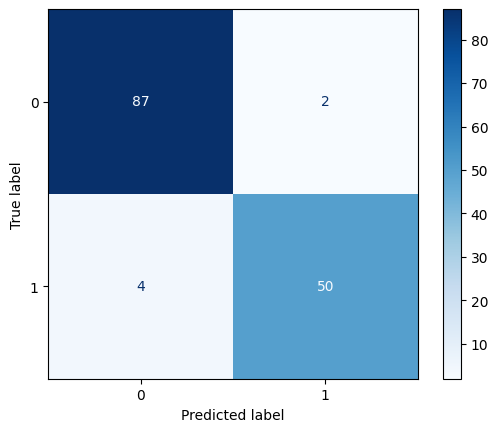

In [ ]:
ConfusionMatrixDisplay.from_estimator(dec_tree_class_3, X_test, y_test, cmap = 'Blues');

3. How many false positives were there?

There were 2 false positives (predicted label positive, true label negative). 

4. How many false negatives were there?

There were 4 false negatives (predicted label negative, true label positive). 

5. For the breast cancer data set, which do you think is more problematic: false positives or false negatives? Explain.

As I assume with many other disease-related datasets, where having the disease is assigned 1, false negatives are more problematic. 

This is because, if there is a false negative, the doctor and patient believe the patient does not have the disease but in fact does. The patient may suffer from the disease but will not receive medical care for it (it will go undiagnosed unless another test is performed). 

If there is a false positive, the patient can undergo more extensive testing to find out they are truly negative for the disease, and will not suffer from having the disease.



## Bagged Classification Model

In [ ]:
# get accuracy for model
print(f"Model's accuracy score on training data: {bag_class.score(X_train, y_train)}")
print(f"Model's accuracy score on testing data: {bag_class.score(X_test, y_test)}")

Model's accuracy score on training data: 1.0
Model's accuracy score on testing data: 0.958041958041958


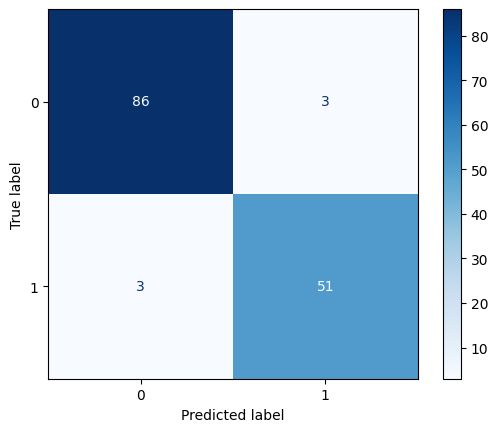

In [ ]:
ConfusionMatrixDisplay.from_estimator(bag_class, X_test, y_test, cmap = 'Blues');

- False positives: 3
- False negatives: 3

## Random Forest Model

In [ ]:
# get accuracy for model
print(f"Model's accuracy score on training data: {rf_class.score(X_train, y_train)}")
print(f"Model's accuracy score on testing data: {rf_class.score(X_test, y_test)}")

Model's accuracy score on training data: 1.0
Model's accuracy score on testing data: 0.972027972027972


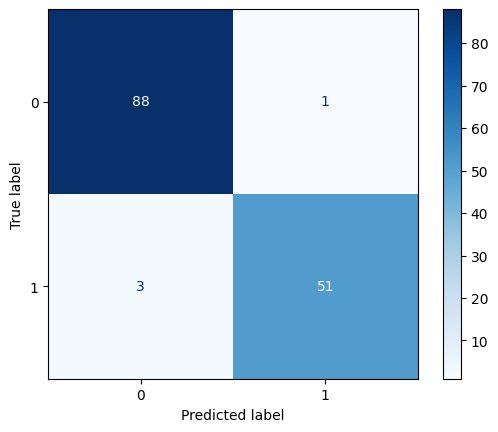

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_class, X_test, y_test, cmap = 'Blues');

- False positives: 1
- False negatives: 3

# **Solutions**

[Assignment Solution](https://github.com/coding-dojo-data-science/machine-learning-practice-solutions/blob/main/Confusion_Matrix_Exercise_(Practice)_Solution.ipynb)
